# Expedia Hotel Booking Searches Prediction Model

Expedia has provided a dataset that includes shopping and purchases data. The dataset of “search result impressions” of an ordered list of hotels on the Expedia website. The data contain impressions where the randomly sorted hotels avoid position bias. The user response is a click on a hotel or a purchased hotel room. 

The project aims to build a machine learning model to predict the booking price of a hotel based on different explanatory variables describing the Expedia search engine and user preferences.

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/competitions/expedia-personalized-sort). See below for more details.

=========================================================================

## Predicting Booking Price of Hotel

The aim of the project is to build a machine learning model to predict the booking price of hotel based on different explanatory variables describing the Expedia search engine and consumer preferences. 

### Why is this important? 

Predicting hotel prices is useful to identify user purchasing trends, and to determine whether the price advertised on Expedia is over or under-estimated, booking searches result in the most affordable prices, etc.

### What is the objective of the machine learning model(s)?

Learning to rank hotels to maximize purchases using forecasting and other machine learning models. Load, filter, and subset a dataset with these variables: 
- prop_id (hotel id) 
- visitor_location_country_id (country id the customer is located in)
- srch_room_count (number of hotel rooms specified in search) 
- date_time (date and time of the search)
- price_usd (the displayed price of the hotel for the given search)
- srch_booking_window (number of future days the hotel stay started from the search date)
- srch_length_of_stay (number of nights stay that was searched)
- srch_saturday_night_bool (+1 if the hotel stay includes a Saturday night with a length of stay is less than or equal to 4 nights; otherwise 0)

# Expedia Hotel Search Dataset: Data Analysis

In the following cells, I will analyse the variables of the Expedia Hotel Search Dataset from Kaggle. I will take you through the different aspects of the analysis of the variables, and introduce you to the meaning of each of the variables in the dataset as well. If you want to know more about this dataset, visit [Kaggle.com](https://www.kaggle.com/competitions/expedia-personalized-sort).

Import libraries for handling, plotting, and display all columns of the dataframe.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

Let's go ahead and load the train dataset.

In [2]:
train = pd.read_csv('train.csv')

It is also important to consider that majority of the columns are numeric data types.

In [3]:
cols = train.columns
num_cols = train._get_numeric_data().columns
num_cols

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv'

#### Data Cleaning

Find out which variables of the dataset contain missing values.

In [4]:
train.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

When looking at which variables contain missing values, we can see that the price competitiveness variables have the most missing variables. The magnitude of the missing values led me to focus on appending this dataset to include the following columns:

1. Hotel characteristics
2. Location attractiveness of hotels
3. User’s aggregate purchase history

We see that most values in the price competitiveness variables are null, which helps to avoid low-performing models. It is safe to remove ‘comp1_rate’, ‘comp1_inv’, and ‘comp1_rate_percent_diff’ to the 8th competitive level.

In [5]:
train.drop(['comp1_rate','comp1_inv','comp1_rate_percent_diff'], axis=1, inplace=True)

In [6]:
train.drop(['comp2_rate','comp2_inv','comp2_rate_percent_diff'], axis=1, inplace=True)

In [7]:
train.drop(['comp3_rate','comp3_inv','comp3_rate_percent_diff'], axis=1, inplace=True)

In [8]:
train.drop(['comp4_rate','comp4_inv','comp4_rate_percent_diff'], axis=1, inplace=True)

In [9]:
train.drop(['comp5_rate','comp5_inv','comp5_rate_percent_diff'], axis=1, inplace=True)

In [10]:
train.drop(['comp6_rate','comp6_inv','comp6_rate_percent_diff'], axis=1, inplace=True)

In [11]:
train.drop(['comp7_rate','comp7_inv','comp7_rate_percent_diff'], axis=1, inplace=True)

In [12]:
train.drop(['comp8_rate','comp8_inv','comp8_rate_percent_diff'], axis=1, inplace=True)

Let evaluate the missing values in this dataset without the competitive variables

In [13]:
train.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

Once we evaluate the missing value after dropping the price competitiveness variables, we can see that the hotel search variables based on the user’s aggregate purchase history suffer from no missing data.

#### Matrix Analysis 

I conducted a matrix analysis to evaluate variables against hotel purchases sorting the highest positive and negative searches. Hotel variables give an idea of which variables to select for the time series analysis.


In [13]:
corr_mat = train.corr(method='pearson')
sorted_mat = corr_mat.unstack().sort_values(axis=0, ascending=False)

# Select the upper triangular in the correlation matrix and not include diagonal elements
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
sorted_upper_mat = upper_tri.unstack().sort_values(axis=0, ascending=False).head(10)
print(sorted_upper_mat)

# Select the lower triangular in the correlation matrix and not include diagonal elements
lower_tri = corr_mat.where(np.tril(np.ones(corr_mat.shape),k=1).astype(np.bool))
sorted_lower_mat = lower_tri.unstack().sort_values(axis=0, ascending=True).head(10)
print(sorted_lower_mat)

booking_bool               click_bool                     0.782697
visitor_hist_adr_usd       visitor_hist_starrating        0.490974
prop_country_id            visitor_location_country_id    0.482386
srch_room_count            srch_adults_count              0.465433
gross_bookings_usd         srch_length_of_stay            0.448546
prop_location_score2       prop_location_score1           0.435277
orig_destination_distance  site_id                        0.342710
                           srch_booking_window            0.321278
prop_brand_bool            prop_country_id                0.309949
prop_review_score          prop_starrating                0.306001
dtype: float64
prop_country_id              orig_destination_distance     -0.363832
site_id                      prop_country_id               -0.313794
                             visitor_location_country_id   -0.304294
visitor_location_country_id  site_id                       -0.304294
srch_length_of_stay          srch_satur

Two triangular parts of the correlation matrix that does not include the diagonal elements are the:

#### Upper Triangular (positive correlations)

To observe the relationship of hotel prices against the country ID where the hotel and customer are, we can see a strong positive correlation between 'prop_country_id' (ID of the country the hotel is in) and 'visitor_location_country_id' (ID of the country the customer is in).

The positive correlation between 'srch_room_count' (number of hotel rooms specified in search) and 'srch_adults_count' (number of adults specified in the hotel room) focuses on the main demographic effect on user aggregate purchasing history. Beneficial in strengthening the relationship between hotel prices against search preferences.

#### Lower Triangular (negative correlations)

To observe the relationship of hotel prices against explanatory hotel search variables, we can see a strong negative correlation between 'srch_length_of_stay' (number of nights stay that users searched) and 'srch_saturday_night_bool' (boolean value of Saturday night with a length of stay less than or equal to 4 nights). Beneficial in predicting the trend in hotel prices based on user preferences.  


Note: test.csv does not contain the columns position, click_bool, gross_bookings_usd, nor booking_bool. However, important booking variables like 'srch_booking_window' does exist in test.csv. Visit [Kaggle.com](https://www.kaggle.com/competitions/expedia-personalized-sort)

#### Subset the dataset

From the matrix analysis, select 'prop_id' /  'visitor_location_country_id' / 'srch_room_count' / 'srch_adults_count' and emphasis the maximum weight on the data. 

In [14]:
# prop_id corresponding to 
train['prop_id'].value_counts()

104517    4733
124342    4707
68420     4580
134154    4550
40279     4535
          ... 
69676        1
72761        1
48140        1
8565         1
127084       1
Name: prop_id, Length: 136886, dtype: int64

In [15]:
train['visitor_location_country_id'].value_counts()

219    5778805
100     990487
55      580072
216     434568
220     350433
        ...   
54          31
198         30
146         30
24          29
8           27
Name: visitor_location_country_id, Length: 218, dtype: int64

In [16]:
# Num of rooms specified in search by customer
train['srch_room_count'].value_counts()

1    9045780
2     734315
3      92372
4      25023
5       8053
8       4950
6       4345
7       2692
Name: srch_room_count, dtype: int64

In [17]:
# Num of adults specified in search by customer
train['srch_adults_count'].value_counts()

2    6494969
1    2315541
4     481440
3     475287
6      63323
5      54180
8      20371
7       9693
9       2726
Name: srch_adults_count, dtype: int64

Load a new dataset that filters these columns: 'prop_id' / 'visitor_location_country_id' / 'srch_room_count':
- prop_id (hotel id) 
- visitor_location_country_id (country id the customer is in)
- srch_room_count (number of hotel rooms specified in search)


Define a list of the time series forecasting variables 'date_time' / 'price_usd' / 'srch_length_of_stay' / 'srch_booking window' / 'srch_saturday_night_bool':
- date_time (date and time of the search)
- price_usd (the displayed price of the hotel for the given search)
- srch_length_of_stay (number of nights stay that users searched)
- srch_booking_window (number of days in the future the hotel stay started from the search date)
- srch_saturday_night_bool (+1 if the hotel stay includes a Saturday night with a length of stay less than or equal to 4 nights; 0 if otherwise)

In [12]:
df = train.loc[train['prop_id'] == 104517]
df = df.loc[df['visitor_location_country_id'] == 219]
df = df.loc[df['srch_room_count'] == 1]
df = df.loc[df['srch_adults_count'] == 2]
df = df[['date_time', 'price_usd','srch_length_of_stay','srch_booking_window','srch_saturday_night_bool']]

In my subset dataset, the hotel id is 104517, the country ID is 219, the number of hotel rooms specified in the search was equal to 1, and the number of adults searching for a room was equal to 2. All these values chosen have the maximum weight on the variables in the dataset. 

View first 10 rows of the subset dataset

In [19]:
df.head(10)

,date_time,price_usd,srch_length_of_stay,srch_booking_window,srch_saturday_night_bool
3152,2013-01-03 20:48:24,186.0,3,6,0
10560,2013-04-29 09:39:50,246.0,2,245,0
11127,2013-03-25 19:43:44,52.0,1,7,0
19171,2013-05-19 19:52:42,68.0,5,42,0
25358,2012-11-14 17:18:51,46.0,1,4,0
26107,2013-01-10 19:22:49,50.0,3,46,0
27061,2013-03-27 14:49:27,122.0,1,100,1
29088,2013-05-20 08:14:41,209.0,2,5,1
34421,2013-06-27 19:02:34,89.0,3,69,0
36093,2013-05-21 18:49:33,66.0,2,7,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 3152 to 9917395
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_time                 2253 non-null   object 
 1   price_usd                 2253 non-null   float64
 2   srch_length_of_stay       2253 non-null   int64  
 3   srch_booking_window       2253 non-null   int64  
 4   srch_saturday_night_bool  2253 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 105.6+ KB


Describe hotel prices of the dataset

In [15]:
df['price_usd'].describe()

count    2253.000000
mean      112.387106
std       127.080798
min         0.120000
25%        67.000000
50%        99.150000
75%       140.000000
max      5584.000000
Name: price_usd, dtype: float64

##### Simple Data Visualization

C:\Users\14087\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Time Series of room price by date time of search')

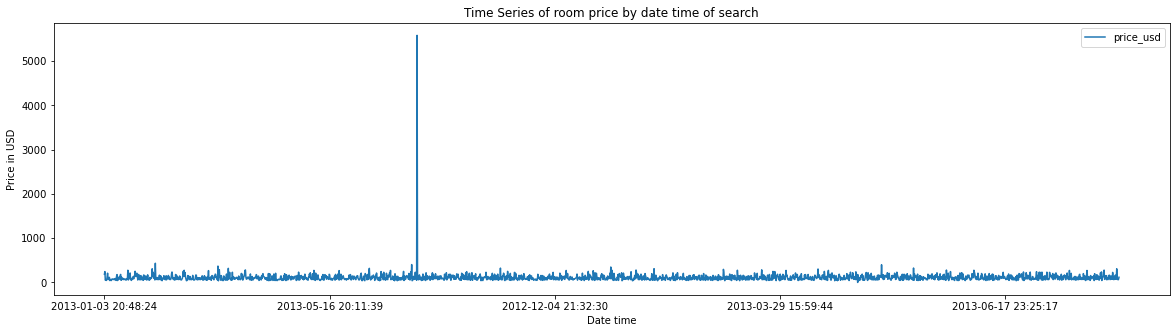

In [22]:
df.plot(x='date_time', y = 'price_usd', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')

We see majority of values in `price_usd` are `< 5584` categorical benchmark so what you can now do is see your stats for data below this

In [13]:
df = df.loc[df['price_usd'] < 5584]
df['price_usd'].describe()

count    2252.000000
mean      109.957438
std        53.391831
min         0.120000
25%        67.000000
50%        99.075000
75%       140.000000
max       434.000000
Name: price_usd, dtype: float64

Convert the timestamps to numerical entities to help provide a basis for a time series analysis.

In [14]:
print(df['date_time'].min())
print(df['date_time'].max())

2012-11-01 02:48:30
2013-06-30 16:43:40


As I will now be working on the `date_time` column lets see a few stats which might enable us to choose best conversion types

In [15]:
df['date_time'].describe()
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

,date_time,price_usd,srch_length_of_stay,srch_booking_window,srch_saturday_night_bool
3152,2013-01-03 20:48:24,186.0,3,6,0
10560,2013-04-29 09:39:50,246.0,2,245,0
11127,2013-03-25 19:43:44,52.0,1,7,0
19171,2013-05-19 19:52:42,68.0,5,42,0
25358,2012-11-14 17:18:51,46.0,1,4,0


### Time Series Analysis - Data Visualization

Lets plot a time series of room prices by date time of hotel search:

Text(0.5, 1.0, 'Time Series of room price by date time of search')

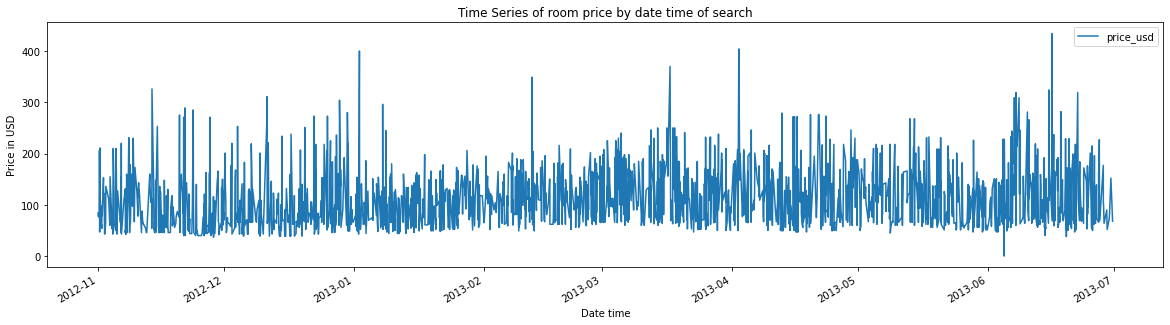

In [19]:
df.plot(x='date_time', y = 'price_usd', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')

I do not see a seasonality trend in this relationship. It is partially a result of too much noise, which hinders my ability to discover insights on dates against USD prices. The dataset has some auto-correlation features and similar trends, repeating at a different slope at the start of the plot. However, the prices fluctuate less and stay relatively lower during the non-holiday months (January to May 2013).

Lets also plot a time series of number of rooms searched by date time of hotel search:

Text(0.5, 1.0, 'Time Series of Number of room search by date time of search')

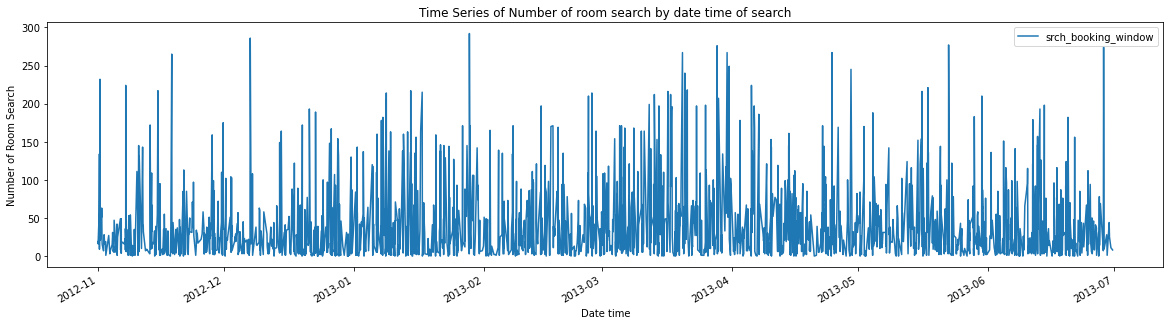

In [20]:
df.plot(x='date_time', y = 'srch_booking_window', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Number of Room Search')
plt.title('Time Series of Number of room search by date time of search')

There is even more noise when trying to discover insights on dates against the number of room searches. There are many outliers in the hotel search window, which makes it tougher to find any seasonality trends. There are no trends that suggest booking windows rise or fall year-round.

To visualize the relationship between numerical variables 'price_usd' and 'srch_booking_window' use a scatter plot.

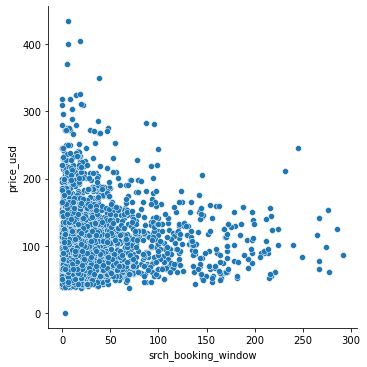

In [28]:
# x and y are the column names of data
sns.relplot(x='srch_booking_window', y='price_usd', data=df)

There is a slightly negative relationship between search booking window and hotel prices. This means that an increase in the  number of days away from the hotel stay by one decreases the hotel price.    

I can also set `hue='srch_saturday_night_bool'` to color our points by whether the hotel stay includes a Saturday night stay. This hue argument is very useful because it allows you to express a third dimension of information between the search booking window and hotel price.

(0.0, 250.0)

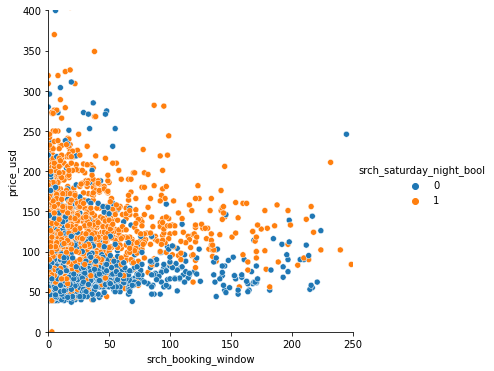

In [29]:
# Scatterplot arguments
sns.relplot(x='srch_booking_window', y='price_usd', data=df,
           hue='srch_saturday_night_bool')   # Color by evolution stage

# Tweak using Matplotlib
plt.ylim(0, 400)
plt.xlim(0, 250)

Hotel searches that include a Saturday night stay are priced higher than hotel searches without a Saturday night. Users spend more on a hotel stay if it includes weekend nights, and pay less if the booking window from the hotel stay is larger. Now that I see the relationship between our two numerical variables, we can assess their distributions and their relation to the boolean variable.

Lets plot the histograms of hotel prices searched and search booking window

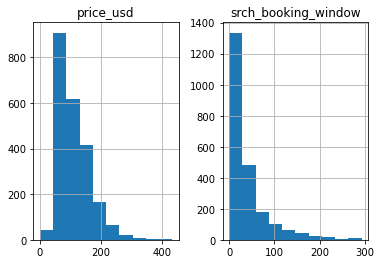

In [30]:
# Histogram
df.hist(column=['price_usd','srch_booking_window'])
plt.show()

 Both histograms show the distribution that suffers from left skewness. The hotel prices and search booking windows also suffer from outliers of hotels with higher prices and more user search traffic.

To see how this time series data has been skewed, I can use a highly correlated variable like 'srch_saturday_night_bool' to distinguish the frequency of prices if the hotel search included a Saturday night stay or not.  

Plot 'srch_saturday_night_bool' and the prices by creating a bar graph:

[]

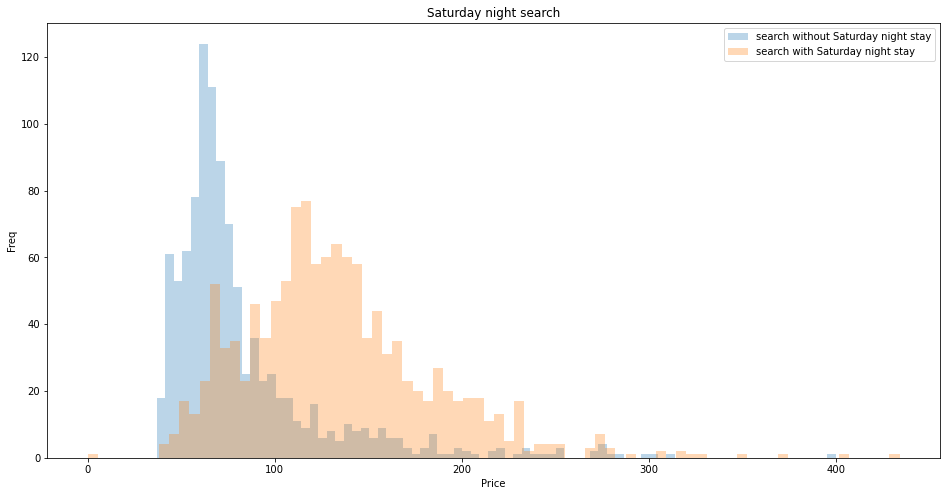

In [31]:
a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

plt.figure(figsize = (16, 8))

plt.hist(a, bins = 80, 
         alpha = 0.3, 
         label = 'search without Saturday night stay')

plt.hist(b, bins = 80, 
         alpha = 0.3, 
         label = 'search with Saturday night stay')

plt.xlabel('Price')
plt.ylabel('Freq')
plt.legend()
plt.title('Saturday night search')
plt.plot()

There seems to be some strong relation between price and search without Saturday night stay, which can be clearly seen by the peak.

Plot 'price_usd' and 'srch_booking_window' on a distribution plot visualizing the univariate or bivariate distribution of data.

C:\Users\14087\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\14087\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


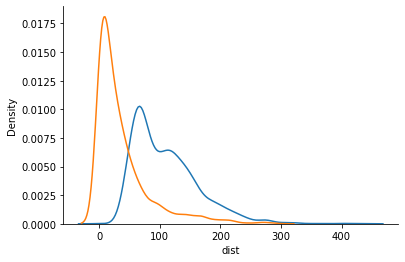

In [21]:
sns.distplot(df['price_usd'], 
                 hist = False, label = 'USD')

sns.distplot(df['srch_booking_window'], 
                  hist = False, label = 'booking window')

plt.xlabel('dist')
sns.despine()

The distribution and histogram plot display a strong relationship between the distribution of hotel prices and the booking window in the lower bin [0, 100]. I can use a box and whisker plot to see a five-number summary, which helps to distinguish outliers in our time series dataset.


Plot 'price_usd' and 'srch_booking_window' on a box and whisker plot visualizing columns in the dataframe on a single figure

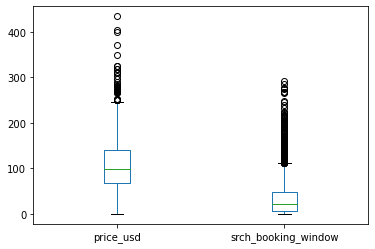

In [33]:
#Displaying columns in the dataframe on a single figure
df[['price_usd','srch_booking_window']].plot(kind='box');

The distribution of search booking window has a smaller range of time series data than the spread of hotel prices. 

There are also a large amount of outliers from both box and whisker plots suggesting that exorbitant hotel prices and number of searches happens frequently. 

Lets plot to see the distribution of hotel prices with respect to 'srch_saturday_night_bool' as box plot

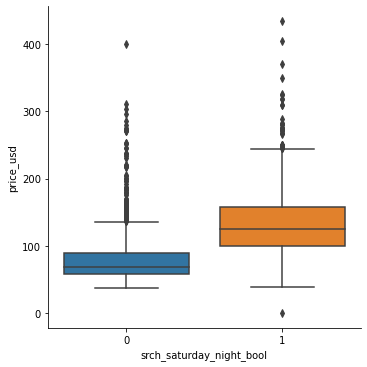

In [34]:
sns.catplot(y='price_usd', x='srch_saturday_night_bool', data=df, kind='box')

The distribution of hotel booking searches with a Saturday night stay has higher mean prices. The hotel booking search without a Saturday night stay has more outlier prices, which suggests that hotel searches without a weekend stay have a wider distribution of prices.


Plot multiple pairwise distribution of hotel prices with respect to 'srch_saturday_night_bool'

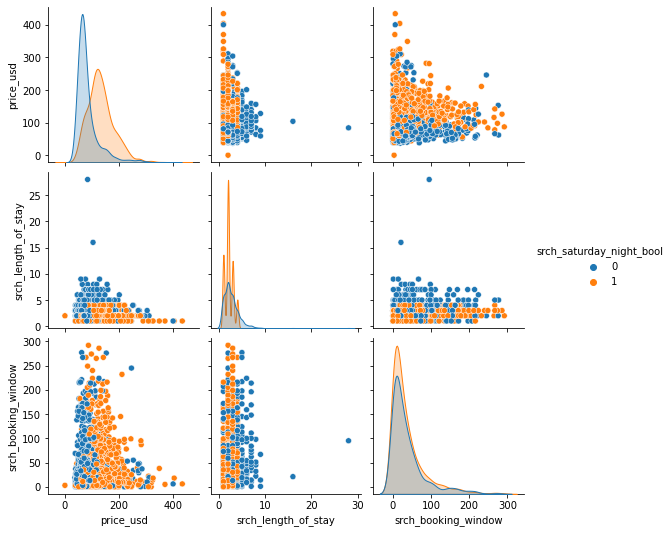

In [35]:
sns.pairplot(df, hue='srch_saturday_night_bool')

From these visualizations above, it is clear that I must transform the data to lower noise and improve the time series forecasting overall. The best transform for the given prediction problems is:
- Predict future hotel prices based on the number of hotel booking searches.
- Predict future hotel prices based on the number of days a user stays.
- Predict future hotel prices based on whether the hotel booking included a weekend stay.


# Expedia Hotel Search Dataset: Feature Engineering

In the following cells, I will re-framed time series data as a supervised learning dataset from the Expedia Hotel Search Dataset. I must choose the variable to be predicted and use feature engineering to construct all of the inputs that will be used to make predictions for future time steps. If you want to know more about this dataset, visit [Kaggle.com](https://www.kaggle.com/competitions/expedia-personalized-sort).

Let's go ahead and load the dataset. Using the time series information of predictive variables will need to be coupled with additional engineered features that may ultimately result in a better model. 

##### Lag Features

The simplest approach is to predict the price of the hotel at the next time (t+1) given the value at the current time (t). The supervised learning problem with shifted hotel prices looks as follows:

In [36]:
from pandas import concat
price = pd.DataFrame(df, columns=['price_usd'])
df_new = concat([price.shift(1), price], axis=1)
df_new.columns = ['t', 't+1']
print(df_new.head(5))

           t    t+1
3152     NaN  186.0
10560  186.0  246.0
11127  246.0   52.0
19171   52.0   68.0
25358   68.0   46.0


I can expand the window width and include more lagged features. This can be modified to include the last 3 observed prices to predict the value at the next time step.


In [37]:
price = pd.DataFrame(df, columns=['price_usd'])
df_new = concat([price.shift(3), price.shift(2), price.shift(1), price], axis=1)
df_new.columns = ['t-2', 't-1', 't', 't+1']
print(df_new.head(5))

         t-2    t-1      t    t+1
3152     NaN    NaN    NaN  186.0
10560    NaN    NaN  186.0  246.0
11127    NaN  186.0  246.0   52.0
19171  186.0  246.0   52.0   68.0
25358  246.0   52.0   68.0   46.0


I must discard the first few rows that do not have enough data to train a supervised model. How large should I make the window for this problem?

Here are the values in the first three rolling windows:

In [38]:
price = pd.DataFrame(df, columns=['price_usd'])
shifted = price.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
df_new = concat([means, price], axis=1)
df_new.columns = ['mean(t-1,t)', 't+1']
print(df_new.head(5))

       mean(t-1,t)    t+1
3152           NaN  186.0
10560          NaN  246.0
11127        216.0   52.0
19171        149.0   68.0
25358         60.0   46.0


I can see that the first two rows are not useful. The values in the first 5 windows suggests that we would not expect usable data until at least the 5th row.

To prove this, I can use the concat() function to construct a new dataset with just our new columns and a window size of 3.

In [39]:
price = pd.DataFrame(df, columns=['price_usd'])
width = 3
shifted = price.shift(width - 1)
window = shifted.rolling(window=width)
df_new = concat([window.min(), window.mean(), window.max(), price], axis=1)
df_new.columns = ['min', 'mean', 'max', 't+1']
print(df_new.head(5))

        min        mean    max    t+1
3152    NaN         NaN    NaN  186.0
10560   NaN         NaN    NaN  246.0
11127   NaN         NaN    NaN   52.0
19171   NaN         NaN    NaN   68.0
25358  52.0  161.333333  246.0   46.0


Checking the correctness of the values on the 5th row (array index 4), we can see that 52 USD is the minimum and 246 USD is the maximum of hotel prices in the window of [52, 161.33, 246] with a predicted future price of 46 USD.

We can still plot a scatter lag plot of this dataframe to see how accurate lag features predict hotel prices after one period. 

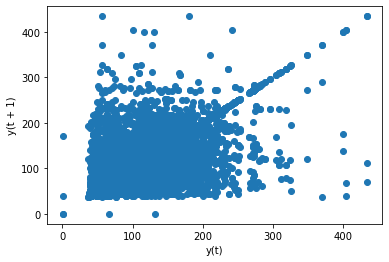

In [40]:
# Scatter Lag Plot
pd.plotting.lag_plot(df_new)
plt.show()

More points tighter into the diagonal line suggests a stronger relationship. However, more spread from this line means a relatively weak positive correlation between observations and their lag1 values.

Create a scatter plot of hotel prices with each value in the previous seven days using the new dataset above.


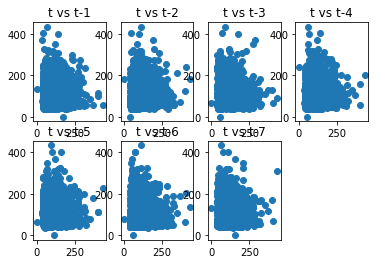

In [41]:
# Multiple Scatter Plot
values = pd.DataFrame(df, columns=['price_usd'])
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()

With this slightly positive relationship between the current price and its lag=1 value, a sign for seasonality trends extracted from this series does not seem reasonable.


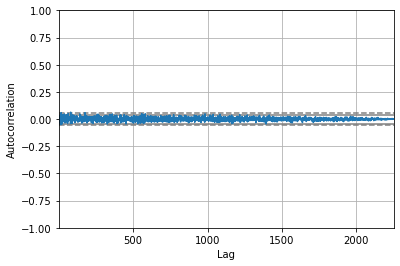

In [42]:
# Autocorrection Plot
pd.plotting.autocorrelation_plot(values)
plt.show()

Since the autocorrelations fell to near zero, we can see cycles of no correlation, suggesting no seasonality trends in this data frame.

##### Log Transformation

Time series variables with an exponential distribution can be made linear by taking the logarithm of the values. There is an extreme increase on the bar graph and an equally extreme extended tail distribution on the histogram.

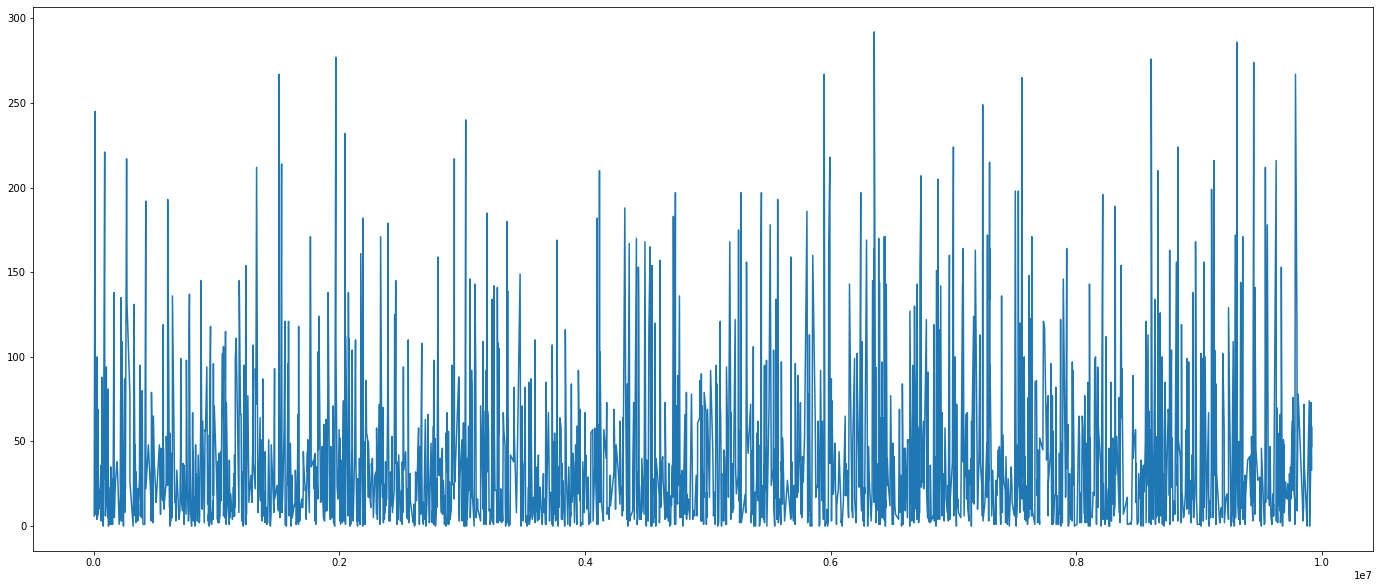

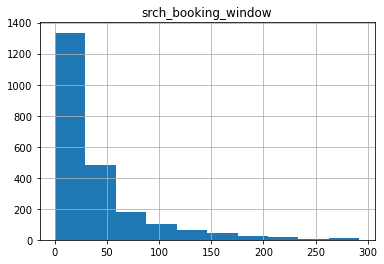

In [18]:
fig = plt.figure(figsize = (24,10))
# Line Plot
plt.plot(df['srch_booking_window'])
# Histogram
df.hist(column=['srch_booking_window'])
plt.show()

The dataset is non-stationary!

This means that the mean and the variance of the observations change over time. This is caused by what appears to be both an seasonality component.

In [16]:
log_var = ['srch_booking_window']

We can expect a logarithmic transform to change the distribution of observations to be perhaps nearly Gaussian.

<AxesSubplot:ylabel='Frequency'>

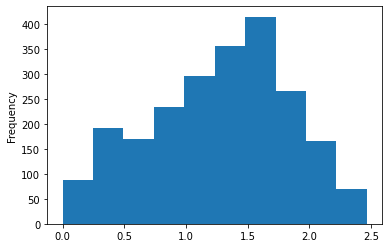

In [19]:
for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    df[transformed] = np.log10(df[var]+1)
    
sub = fig.add_subplot(2, 5, j + 1)
sub.set_xlabel(var)
df[transformed].plot(kind = 'hist')

We see that the logarithmic transform changes the distribution of observations to be Gaussian.

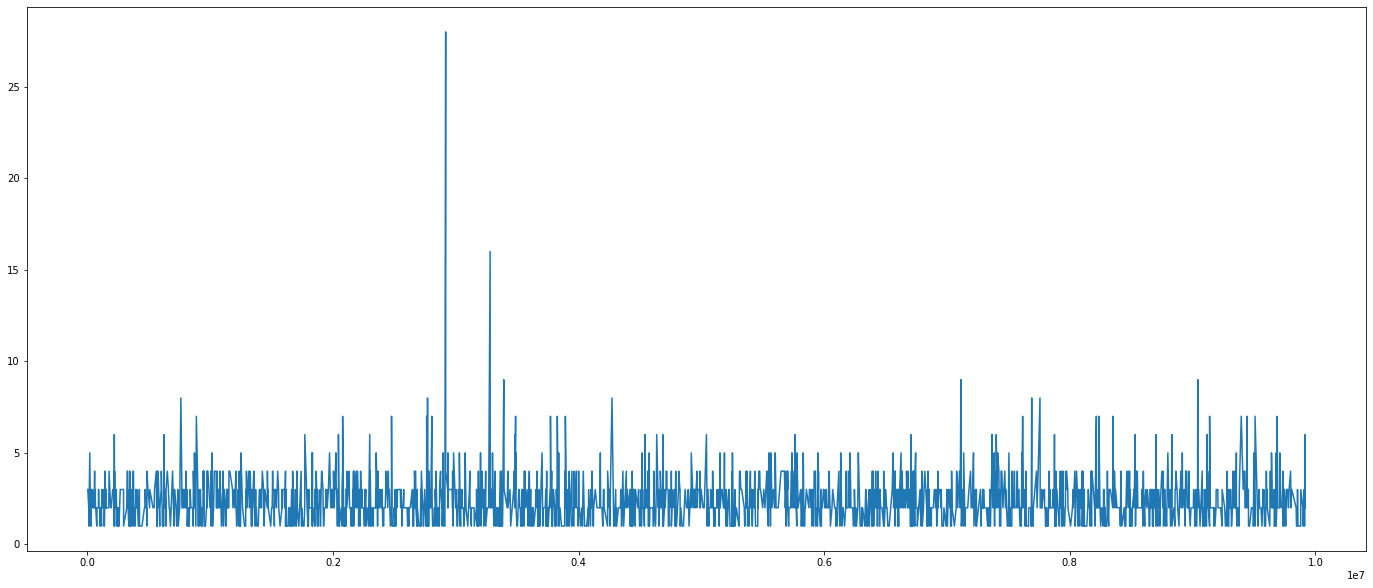

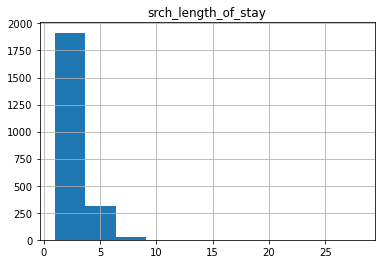

In [20]:
fig = plt.figure(figsize = (24,10))
# Line Plot
plt.plot(df['srch_length_of_stay'])
# Histogram
df.hist(column=['srch_length_of_stay'])
plt.show()

The dataset is non-stationary!

This means that the mean and the variance of the observations change over time. This is caused by what appears to be both an seasonality component.

In [21]:
log_var = ['srch_length_of_stay']

We can expect a logarithmic transform to change the distribution of observations to be perhaps nearly Gaussian.

<AxesSubplot:ylabel='Frequency'>

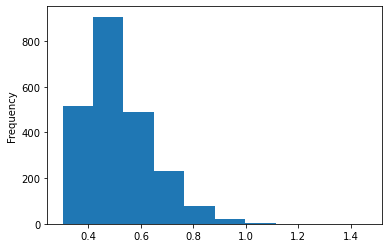

In [22]:
for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    df[transformed] = np.log10(df[var]+1)
    
sub = fig.add_subplot(2, 5, j + 1)
sub.set_xlabel(var)
df[transformed].plot(kind = 'hist')

We see that the logarithmic transform changes the distribution of observations to be nearly Gaussian.

The histogram slight right-skewness suggesting that there are more occurrences of the lower number of days spent in a hotel than the numbers occurrences of the higher number of days spent in a hotel. 


In [23]:
df.drop(columns=['srch_booking_window','srch_length_of_stay'], inplace=True)
df.head(5)

,date_time,price_usd,srch_saturday_night_bool,log_srch_booking_window,log_srch_length_of_stay
3152,2013-01-03 20:48:24,186.0,0,0.845098,0.602060
10560,2013-04-29 09:39:50,246.0,0,2.390935,0.477121
11127,2013-03-25 19:43:44,52.0,0,0.903090,0.301030
19171,2013-05-19 19:52:42,68.0,0,1.633468,0.778151
25358,2012-11-14 17:18:51,46.0,0,0.698970,0.301030


##### Moving Average Smoothing

Smoothing the time series data to remove the fine-grained variation between time steps seen in the lag features reduces noise and improves signal in time series forecasting. Moving average is a source of new information when modeling a time series forecast as a supervised learning problem. 

In [51]:
lagprice = pd.DataFrame(df, columns=['date_time','price_usd'])

In [52]:
lagprice.head(1)

,date_time,price_usd
3152,2013-01-03 20:48:24,186.0


I need to make sure that the hotel prices is converted to a numeric data type and the DatetimeIndex has no missing values.

In [53]:
lagprice.index = pd.to_datetime(lagprice.index, errors = 'coerce')
lagprice = lagprice[~pd.isnull(lagprice.index)]
lagprice['price_usd'] = pd.to_numeric(lagprice['price_usd'])

In [54]:
lagprice.drop(columns=['date_time'], inplace=True)
lagprice.head(1)

,price_usd
1970-01-01 00:00:00.000003152,186.0


A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value.

In [55]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
dfw = DataFrame(lagprice, columns=['price_usd'])
window = dfw.expanding()
dfw_new = concat([window.min(), window.mean(), window.max(), dfw.shift(-1)], axis=1)
dfw_new.columns = ['min', 'mean', 'max', 't+1']
print(dfw_new.head(5))

                                 min        mean    max    t+1
1970-01-01 00:00:00.000003152  186.0  186.000000  186.0  246.0
1970-01-01 00:00:00.000010560  186.0  216.000000  246.0   52.0
1970-01-01 00:00:00.000011127   52.0  161.333333  246.0   68.0
1970-01-01 00:00:00.000019171   52.0  138.000000  246.0   46.0
1970-01-01 00:00:00.000025358   46.0  119.600000  246.0   50.0


In [56]:
# moving average smoothing as feature engineering
from pandas import concat
dfs = DataFrame(lagprice, columns=['price_usd'])
width = 3
lag1 = dfs.shift(1)
lag3 = dfs.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
df_new = concat([means, lag1, dfs], axis=1)
df_new.columns = ['mean', 't', 't+1']
print(df_new.head(10))

                                     mean      t    t+1
1970-01-01 00:00:00.000003152         NaN    NaN  186.0
1970-01-01 00:00:00.000010560         NaN  186.0  246.0
1970-01-01 00:00:00.000011127         NaN  246.0   52.0
1970-01-01 00:00:00.000019171         NaN   52.0   68.0
1970-01-01 00:00:00.000025358  161.333333   68.0   46.0
1970-01-01 00:00:00.000026107  122.000000   46.0   50.0
1970-01-01 00:00:00.000027061   55.333333   50.0  122.0
1970-01-01 00:00:00.000029088   54.666667  122.0  209.0
1970-01-01 00:00:00.000034421   72.666667  209.0   89.0
1970-01-01 00:00:00.000036093  127.000000   89.0   66.0


We can use moving average can be used to make a naive prediction where it assumes that the trend and seasonality has been removed or adjusted for. I hope to use this model to gauge how well my engineered features are doing at predicting my target variable of hotel prices.

predicted=161.333333, expected=68.000000
predicted=122.000000, expected=46.000000
predicted=55.333333, expected=50.000000
predicted=54.666667, expected=122.000000
predicted=72.666667, expected=209.000000
predicted=127.000000, expected=89.000000
predicted=140.000000, expected=66.000000
predicted=121.333333, expected=111.000000
predicted=88.666667, expected=115.000000
predicted=97.333333, expected=43.000000
predicted=89.666667, expected=66.000000
predicted=74.666667, expected=64.000000
predicted=57.666667, expected=43.000000
predicted=57.666667, expected=68.000000
predicted=58.333333, expected=78.000000
predicted=63.000000, expected=73.000000
predicted=73.000000, expected=64.000000
predicted=71.666667, expected=76.000000
predicted=71.000000, expected=73.000000
predicted=71.000000, expected=62.000000
predicted=70.333333, expected=68.000000
predicted=67.666667, expected=90.000000
predicted=73.333333, expected=58.000000
predicted=72.000000, expected=46.000000
predicted=64.666667, expected=1

predicted=166.666667, expected=99.000000
predicted=155.666667, expected=64.000000
predicted=95.000000, expected=116.000000
predicted=93.000000, expected=114.000000
predicted=98.000000, expected=64.630000
predicted=98.210000, expected=100.000000
predicted=92.876667, expected=108.000000
predicted=90.876667, expected=44.000000
predicted=84.000000, expected=120.000000
predicted=90.666667, expected=96.000000
predicted=86.666667, expected=125.000000
predicted=113.666667, expected=108.000000
predicted=109.666667, expected=111.000000
predicted=114.666667, expected=44.000000
predicted=87.666667, expected=141.000000
predicted=98.666667, expected=159.000000
predicted=114.666667, expected=43.000000
predicted=114.333333, expected=131.010000
predicted=111.003333, expected=62.000000
predicted=78.670000, expected=215.000000
predicted=136.003333, expected=94.000000
predicted=123.666667, expected=148.000000
predicted=152.333333, expected=108.000000
predicted=116.666667, expected=220.000000
predicted=158

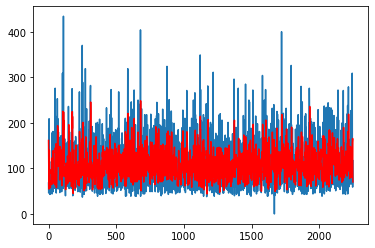

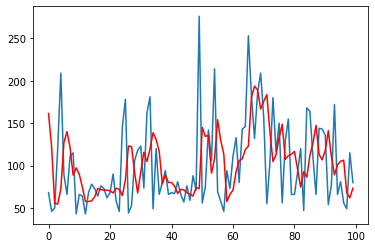

In [57]:
# moving average smoothing as a naive forecast model
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = lagprice['price_usd']
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()

The first line plot shows the full Expedia Hotel Search Dataset (blue) with a moving average prediction (red). These raw observations are plotted with the moving average transform overlaid.

The second line plot shows the lag in the transformed dataset of the first 100 observations from the Expedia Hotel Search Dataset (blue) with a moving average prediction (red).

The model forecasts prices for the next day as new prices are made available (e.g., daily, monthly, yearly). This result shows a root mean squared error (RMSE) of 61.67 USD per hotel booking search. An RMSE above 60 USD indicates the predicted hotel prices have relatively high variability from the mean hotel price.  

# Expedia Hotel Search Dataset: Feature Selection

### Define training and testing sets

Before beginning to apply my engineered features, it is important to define my training and testing set. When engineering features, some techniques learn parameters from data. It is important to learn this parameters only from the train set. This is to avoid over-fitting. 

View first 5 rows of the subset dataset after the logarithmic transformation

In [29]:
df.head(5)

,date_time,price_usd,srch_saturday_night_bool,log_srch_booking_window,log_srch_length_of_stay
3152,2013-01-03 20:48:24,186.0,0,0.845098,0.602060
10560,2013-04-29 09:39:50,246.0,0,2.390935,0.477121
11127,2013-03-25 19:43:44,52.0,0,0.903090,0.301030
19171,2013-05-19 19:52:42,68.0,0,1.633468,0.778151
25358,2012-11-14 17:18:51,46.0,0,0.698970,0.301030


From this subset dataset, I am interested in predicting hotel prices based on user's aggregate purchase history - number of future days before the hotel stay, number of hotel stays that include a Saturday night, and number of nights.

First, set the DatetimeIndex for the subset training set using set_index() function  

In [24]:
df_new = df.set_index('date_time')          
print(df_new)

                     price_usd  srch_saturday_night_bool  \
date_time                                                  
2013-01-03 20:48:24      186.0                         0   
2013-04-29 09:39:50      246.0                         0   
2013-03-25 19:43:44       52.0                         0   
2013-05-19 19:52:42       68.0                         0   
2012-11-14 17:18:51       46.0                         0   
...                        ...                       ...   
2013-01-02 19:36:56      107.0                         1   
2013-02-23 12:27:10       81.0                         0   
2012-11-17 17:53:21       59.0                         0   
2013-04-26 18:52:31       71.0                         0   
2013-02-23 11:03:49      117.0                         1   

                     log_srch_booking_window  log_srch_length_of_stay  
date_time                                                              
2013-01-03 20:48:24                 0.845098                 0.602060  
201

Extract feature matrix and target array

In [25]:
X = df_new.drop('price_usd', axis=1)
X.head()

,srch_saturday_night_bool,log_srch_booking_window,log_srch_length_of_stay
date_time,,,
2013-01-03 20:48:24,0,0.845098,0.602060
2013-04-29 09:39:50,0,2.390935,0.477121
2013-03-25 19:43:44,0,0.903090,0.301030
2013-05-19 19:52:42,0,1.633468,0.778151
2012-11-14 17:18:51,0,0.698970,0.301030


In [26]:
y = df_new['price_usd']
y.head()

date_time
2013-01-03 20:48:24    186.0
2013-04-29 09:39:50    246.0
2013-03-25 19:43:44     52.0
2013-05-19 19:52:42     68.0
2012-11-14 17:18:51     46.0
Name: price_usd, dtype: float64

**Separating the data into train (70%) and test (30%) involves randomness, therefore, we need to set the seed.**

In [27]:
from sklearn.model_selection import train_test_split
pd.pandas.set_option('display.max_columns', None)

In [28]:
# Separating the data into train (70%) and test (30%) set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

print('The shape of X_train is: {}'.format(X_train.shape))
print('The shape of X_test is: {}'.format(X_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))

The shape of X_train is: (1576, 3)
The shape of X_test is: (676, 3)
The shape of y_train is: (1576,)
The shape of y_test is: (676,)


# Expedia Hotel Search Dataset: Model Building

To assess the selected features from this subset dataset, we can run a linear regression model to evaluate the predictive capabilities of users’ aggregate purchasing history on hotel prices.

Apply linear regression model

Goal is to minimize the difference between the actual price and the price estimated using the mean squared error (mse) and the root mean squared error (rmse).

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("mean absolute error of linear regression model: ", metrics.mean_squared_error(y_pred, y_test))
print("root of mean squared error of linear regression model: ", np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

mean absolute error of linear regression model:  2094.911195251264
root of mean squared error of linear regression model:  45.77019986029408


In this linear regression, the mean absolute error is much greater than the average hotel prices in the summary statistics at 112 USD. This higher average price means a wider distribution with a (strong) positive skewness. The rmse at 45.77 is a large distance between the predicted and actual hotel prices. Therefore, linear regression is not effective at predicting prices. 

In [30]:
model.coef_

array([50.50888214, -5.04620376,  8.59934894])

The R2 score can measure the variation in the hotel prices explained by the explanatory hotel variables.

In [31]:
from sklearn.metrics import r2_score
#Predict and score the model
print(r2_score(y_pred, y_test))

-2.3297562399528324


We can see here that the linear regression fits worse than a constant function that always predicts the mean of the data at a -2.33 score.

### Comparing Classifiers' Performance 

I have determined that linear regression is not good at predicting a numerical value like price.

I changed my original problem by predicting future occupancy with a Saturday night or more than four nights based on hotel price, search length of stay, and search booking window.

First, set the DatetimeIndex for the subset dataset using the set_index() function for classification models predicting the boolean variable 'srch_saturday_night_bool'


In [87]:
df_bool = df.set_index('date_time')          
print(df_bool)

                     price_usd  srch_saturday_night_bool  \
date_time                                                  
2013-01-03 20:48:24      186.0                         0   
2013-04-29 09:39:50      246.0                         0   
2013-03-25 19:43:44       52.0                         0   
2013-05-19 19:52:42       68.0                         0   
2012-11-14 17:18:51       46.0                         0   
...                        ...                       ...   
2013-01-02 19:36:56      107.0                         1   
2013-02-23 12:27:10       81.0                         0   
2012-11-17 17:53:21       59.0                         0   
2013-04-26 18:52:31       71.0                         0   
2013-02-23 11:03:49      117.0                         1   

                     log_srch_booking_window  log_srch_length_of_stay  
date_time                                                              
2013-01-03 20:48:24                 0.845098                 0.602060  
201

The key categorical variable here is 'srch_saturday_night_bool' which tells you how many hotel residents stayed past Saturday night. 

Extract feature matrix and target array

In [88]:
X = df_bool.drop('srch_saturday_night_bool', axis=1)
X.head()

,price_usd,log_srch_booking_window,log_srch_length_of_stay
date_time,,,
2013-01-03 20:48:24,186.0,0.845098,0.602060
2013-04-29 09:39:50,246.0,2.390935,0.477121
2013-03-25 19:43:44,52.0,0.903090,0.301030
2013-05-19 19:52:42,68.0,1.633468,0.778151
2012-11-14 17:18:51,46.0,0.698970,0.301030


In [89]:
y = df_bool['srch_saturday_night_bool']
y.head()

date_time
2013-01-03 20:48:24    0
2013-04-29 09:39:50    0
2013-03-25 19:43:44    0
2013-05-19 19:52:42    0
2012-11-14 17:18:51    0
Name: srch_saturday_night_bool, dtype: int64

Separating the data into training and test set involving randomness where the test set size is 30% while training set is 70%.

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  

Import several classifiers included in the sklearn package

In [56]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [sk.ensemble.RandomForestClassifier(n_jobs=-1), 
        sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),
        sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

I divided the dataset into ten subsets. One of the ten subsets is a test set, and the other nine are in a training set.

In [57]:
nfolds = 10

In [58]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=nfolds, random_state=0, shuffle=True)

Compare the classifiers' performances in terms of average Area Under the Curve (AUC) score

In [59]:
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl, X, y, cv=kf, n_jobs=-1, scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

RandomForestClassifier(n_jobs=-1) 0.8648167645983905
GaussianNB() 0.8283509945710927
LogisticRegression(n_jobs=-1) 0.8314412248305235
DecisionTreeClassifier() 0.7597493485793861
AdaBoostClassifier() 0.8605295766377596
QuadraticDiscriminantAnalysis() 0.8278826942927069
MLPClassifier() 0.8360679578784437
SVC() 0.8260215305544684
***********************************************
Best is... RandomForestClassifier(n_jobs=-1) 0.8648167645983905


The Random Forest Classification model has the highest accuracy score at 86.32% in terms of average AUC. 

#### Classifier training and evaluation in classification prediction using cross-validation

Calculate the average AUC score across all ten trials. Make sure to define 'n_job=-1' to use all processors and avoid the machine learning model getting stuck.

In [45]:
import sklearn as sk
avgCV_AUC = sk.model_selection.cross_val_score(cl, X, y, cv=kf, n_jobs=-1, 
                                               scoring='roc_auc').mean()

In [46]:
avgCV_AUC

0.8260215305544684

The average AUC score across all ten subsets is 0.826. It ranks a random positive outcome (the ability to determine a person's hotel stay includes a Saturday night based on the test set) more than 80% of the time. This score suggests a better-performing model and distinguishes between the positive and negative classes well. 

### Random Forest Classification Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

Create a Random Forst Classifier that estimate 100 trees, a maximum depth of 2 leaves, and it is in a random state.

In [63]:
# creating a RF classifier
model = RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=0) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = model.predict(X_test)

#### Summarize the subset dataset and calculate accuracy

Summarize the training sets for any missing values and the shape of the dataset.

In [67]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1576, 3)
Series([], dtype: int64)


The Random Forest Classifier is now ready to predict a person's hotel stay with a Saturday night and more than four nights.  


In [64]:
# using metrics module for accuracy calculation
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8076923076923077


The accuracy of the Random Forest Classifier is slightly above 80%, which means the model performs well. 

### Decision Tree Classification Model

#### Choose decision tree classifer: `DecisionTreeClassifier`

The decision-tree classifier defines a maximum depth of two nodes and a random state. The tree predicts the number of people whose hotel stay includes a Saturday night and more than four nights.
 

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [48]:
model = tree.DecisionTreeClassifier(max_depth=2, random_state=0)

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

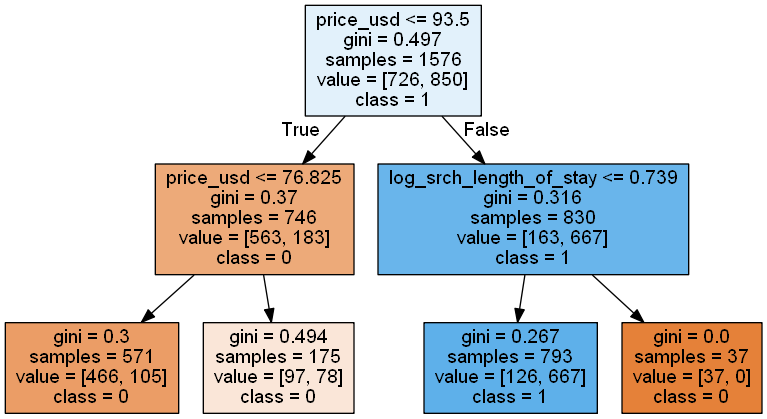

In [52]:
# This code will visualize a decision tree clf, trained with the attributes in X and the class labels in Y
from IPython.display import Image  
import pydotplus
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in y.unique()]
tree.export_graphviz(model, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png(), width=700)

#### Interpret the decision tree result 

Hotel price that falls below and is equal to 93.5 USD for 1576 samples in the first node. The hotel prices that satisfy the condition were 850 hotel prices, while 726 hotel prices did not.

The first node splits the hotel prices that were less than and equal to 76.82 USD with a sample of 725 instances in the left second node. The hotel prices are below and equal to 76.82 USD for 563 samples with a Saturday night stay. The hotel prices above 76.82 USD have a 183 sample size with a Saturday night stay.

Hotel prices fell below or equal to 76.82 USD for a 571 sample including a Saturday night. Hotel prices rose above 76.82 USD for 175 samples not including a Saturday night.
The first node splits the user length of stay that falls below five nights (10^0.739 equals about 5) with a sample of 163 instances in the right second node. The user length of stay rises above five nights for 667 samples. The user length of stay falls below and is equal to 5 nights for 163 samples.

The user length of stay that fell below or equal to five nights had a 793 sample, not including a Saturday night. The user length of stay rose above five nights for 37 samples including a Saturday night. 


Predict the labels of the data values on the basis of the trained model.

In [54]:
y_test_predict = model.predict(X_test)
y_test_predict

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)

0.8165680473372781

The accuracy of the decision tree model at predicting hotel prices with a Saturday night stay is above 80%. This model performs much better than the estimated average AUC score for the DecisionTreeClassifier.


### Logistic Regression Classification Model

The logistic regression has a high average AUC score, which means a better-performing model and distinguishes between the positive and negative binary classes. This model determines the best-predicted weights as close as possible to all actual responses.


#### Choose model: `sklearn.linear.LogisticRegression`

The logistic regression is a non linear transformation, which means the odds of the target array (y) being assigned binary class 1 given the feature matrix (X) is also non linear. Meanwhile, the log odds of the target array (y) being 1 is a linear relationship.

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression(solver='liblinear')

In [80]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Predict the labels of the data values on the basis of the trained model.

In [81]:
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

#### Logistic Regression: Classification Metrics

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       306
           1       0.83      0.75      0.79       370

    accuracy                           0.78       676
   macro avg       0.78      0.78      0.78       676
weighted avg       0.78      0.78      0.78       676



It shows our precision, recall, and F-1 major. Support means the sample size of 676 instances. 306 of the samples are in category 0 and 370 are in category 1.

In the categories that were 0:
- The precision is 0.73 is the ratio of hotel stays with a Saturday night predicted to be true, which could be better.
- The recall is 0.81 is the ratio of hotel stays with a Saturday night identified from those that had real Saturday night stays, which is better.
- The f-1 score is 0.77, which is still far from 1. This f-1 score means that this classification model could be improved upon.

In the categories that were 1:
- The precision is 0.83 is the ratio of hotel stays with a Saturday night predicted to be true, which is better than in categories that were 0.
- The recall is 0.75 is the ratio of hotel stays with a Saturday night identified from those that had real Saturday night stays, which is worse than in categories that were 0.
- The f-1 score is 0.79, which is closer to 1. This f-1 score means that this classification model has slightly improved.


Despite the capabilities of the logistic regression model predicting binary classes, we can see in comparing classifiers that the logistic regression has an accuracy AUC score greater than 80%.


### Partition Method (K-Means) Clustering Model

The classification and regression models above predict a hotel stay on a Saturday night and over four nights based on the feature matrix.

In a clustering mode, it carries out the same unsupervised learning problem around user segmentation - whether their hotel stays included a Saturday night or over four nights - based on the same feature matrix.


In [60]:
df.keys()

Index(['date_time', 'price_usd', 'srch_saturday_night_bool',
       'log_srch_booking_window', 'log_srch_length_of_stay'],
      dtype='object')

#### Apply the KMeans clustering algorithm to identify 2 clusters of hotel searches

In [72]:
df2=pd.DataFrame.copy(df_new)

In [73]:
df2 = df2.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

In [74]:
df2.fillna(0, inplace=True)

In [75]:
df2.head(5)

,price_usd,srch_saturday_night_bool,log_srch_booking_window,log_srch_length_of_stay
0,186.0,0.0,0.845098,0.602060
1,246.0,1.0,2.390935,0.477121
2,52.0,0.0,0.903090,0.301030
3,68.0,0.0,1.633468,0.778151
4,46.0,0.0,0.698970,0.698970


In [76]:
# to divide train and test set
from sklearn.model_selection import train_test_split
X = df2.drop('srch_saturday_night_bool', axis=1)
y = df2['srch_saturday_night_bool']
# Remember to set the seed (random_state for this sklearn function)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [77]:
from sklearn.cluster import KMeans

In [78]:
clu = KMeans(n_clusters=2, random_state=0)

In [79]:
clu

KMeans(n_clusters=2, random_state=0)

In [80]:
model = clu.fit(X_train, y_train)

Predict the labels of the data values on the basis of the trained model.

In [81]:
model.labels_

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

#### Compare clustering methods based upon silhouette score

The k-mean clustering algorithm identifies two clusters of hotel searches:

In [82]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    print ('k = %d ' % k)
    clus = [KMeans(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(df2)
        sil = metrics.silhouette_score(df2, res.labels_)
        print (str(cl)[:5] + ' with k = ' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl
            bestK = k
print('***********************************************')
print ('Best algorithm is... ' + str(bestCl)[:6] + '  with k = ' +str(bestK) )
print('**********************')
print ('With Silhouette Score ' + str(bestSil))

k = 2 
KMean with k = 2: 0.5946
Agglo with k = 2: 0.5931
k = 3 
KMean with k = 3: 0.5559
Agglo with k = 3: 0.5671
k = 4 
KMean with k = 4: 0.5593
Agglo with k = 4: 0.5417
k = 5 
KMean with k = 5: 0.5397
Agglo with k = 5: 0.4923
***********************************************
Best algorithm is... KMeans  with k = 2
**********************
With Silhouette Score 0.5945659286427486


With a silhouette score of 0.59, the data points are not compact within the cluster where it belongs to a person with either a hotel stay with or without a Saturday night stay. 

## Conclusion

The goal is to develop a machine learning model that accurately predicts hotel prices using classification, regression, and clustering techniques to assess the predictability of hotel prices based on explanatory search variables.

Predicting hotel prices using a linear regression model was ineffective. I focused on predicting hotel stays that include a Saturday night and more than four nights based on hotel price, search length of a hotel stay, and search booking window.


### Finding 1
Expedia searches for hotel prices that have no seasonality trends and it has to do with the noise, which hinders my ability to discover insights on dates against USD prices. Many outliers in the hotel search window compared to the discrepancy of hotel prices makes it tougher to find any seasonality trends. In the negative relationships between the hotel search explanatory variables and hotel prices, we can see that variance between the hotel prices and these variables indicate a wider distribution of prices. 

### Finding 2
In using classifier models, Expedia users who search for hotel stays that include a Saturday night and more than four nights are a much better target variable to predict than the listed Expedia hotel prices. The linear regression model is not good at predicting hotel prices, which fits worse than a constant function that predicts the mean of the data at a -2.33 R2 score. 

When comparing the classifiers’ performance in predicting binary classes, a Random Forest Classification model had the highest accuracy score of 86.32%. Cross-validating between classifiers found that across ten trials, a random positive outcome (ability to determine a person's hotel stay includes a Saturday night based on the test set) was higher than an unexpected negative outcome more than 80% of the time. These classification methods allow for predicting discrete class labels, avoid the assumption of linearity between hotel prices and explanatory hotel variables, and reduce noise and overfitting.

### Finding 3
To account for a clustering model, it carries out an unsupervised learning problem to further expand on the user segmentation - whether their hotel search includes or does not include a Saturday night stay and a stay over four nights. Define the number of clusters at two (one for hotel searches that has a binary class at 1 and another at 0). This clustering method adapts to single out certain features like hotel prices that distinguish the binary classification. With a silhouette score of 0.59, the data points are not compact within the cluster where it belongs to a person with either a hotel stay with or without a Saturday night stay. Two clusters of hotel searches are far from being a perfect cluster.
